In [7]:
%pylab inline
import networkx as nx
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [ ]:
nx.set_node_attributes()

In [73]:
n_agents = 100
mean_degree = 5
active_probability = .05
g = nx.gnp_random_graph(n_agents, mean_degree/n_agents)

nx.set_node_attributes(g, 'state', {i:np.random.binomial(1, active_probability) for i in range(n_agents)})
#nx.set_node_attributes(g, 'threshold', {i:np.random.rand() for i in range(n_agents)})
nx.set_node_attributes(g, 'threshold', {i:.2 for i in range(n_agents)})

#nx.draw_networkx(g, node_color=['r' if g.node[i]['state'] else 'b' for i in range(n_agents)], alpha=.5)
g.node[1]

{'state': 0, 'threshold': 0.2}

/Users/houghton/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/houghton/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


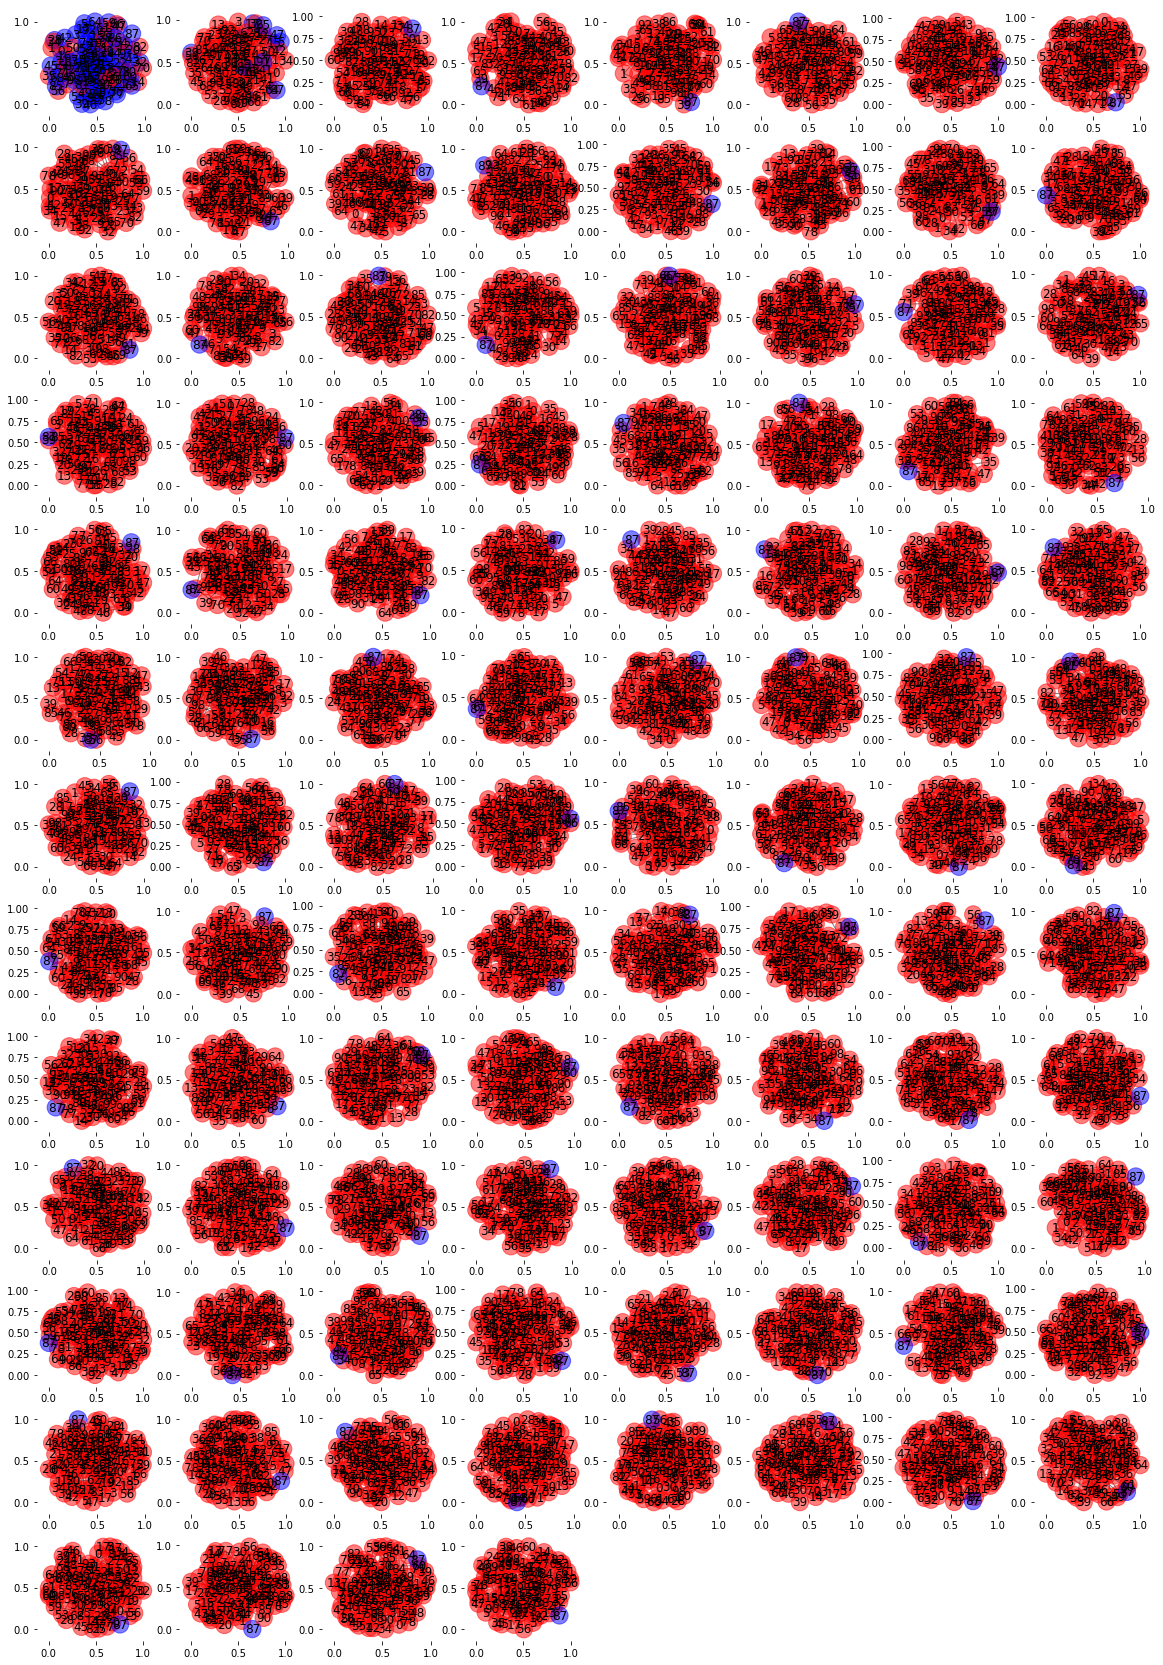

In [74]:
plt.figure(figsize=(20,30))
t_steps = 100
for t in range(t_steps):
    for n in np.random.permutation(g.nodes()):
        neighbor_activation = np.mean([g.node[i]['state'] for i in nx.neighbors(g, n)])
        g.node[n]['state'] = neighbor_activation >= g.node[n]['threshold']
    plt.subplot(int(np.ceil(t_steps/8)), 8, t+1)
    nx.draw_networkx(g, node_color=['r' if g.node[i]['state'] else 'b' for i in range(n_agents)], alpha=.5)
    plt.box('off')
        
        